# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.special import factorial
import matplotlib.pyplot as plt
import seaborn as sns

### Importe o dataset

In [4]:
dataset = pd.read_csv('dados_projeto.csv', sep = ';')


### Visualize o conteúdo do DataFrame

In [5]:
dataset.head(5)

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [8]:
dataset.describe().round(2)

,Y,X
count,365.00,365.00
mean,25401.37,21.23
std,4399.14,3.18
min,14343.00,12.90
25%,22008.00,19.02
50%,24867.00,21.38
75%,28631.00,23.28
max,37937.00,28.86


### Análise gráfica
### Construa um box plot para cada variável do dataset

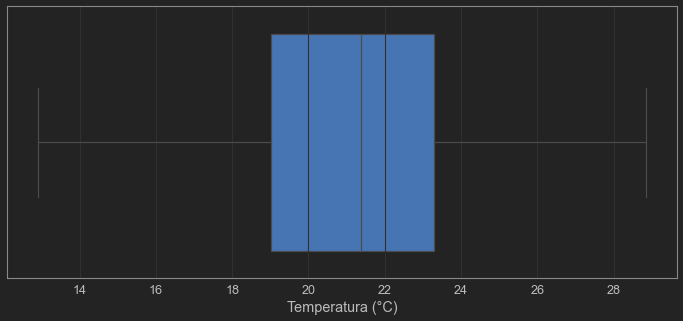

In [15]:
ax = sns.boxplot(x= 'X', data= dataset)
ax.set_xlabel('Temperatura (°C)')
ax.figure.set_size_inches(12,5)


Text(0.5, 0, 'Liters of beer consumed')

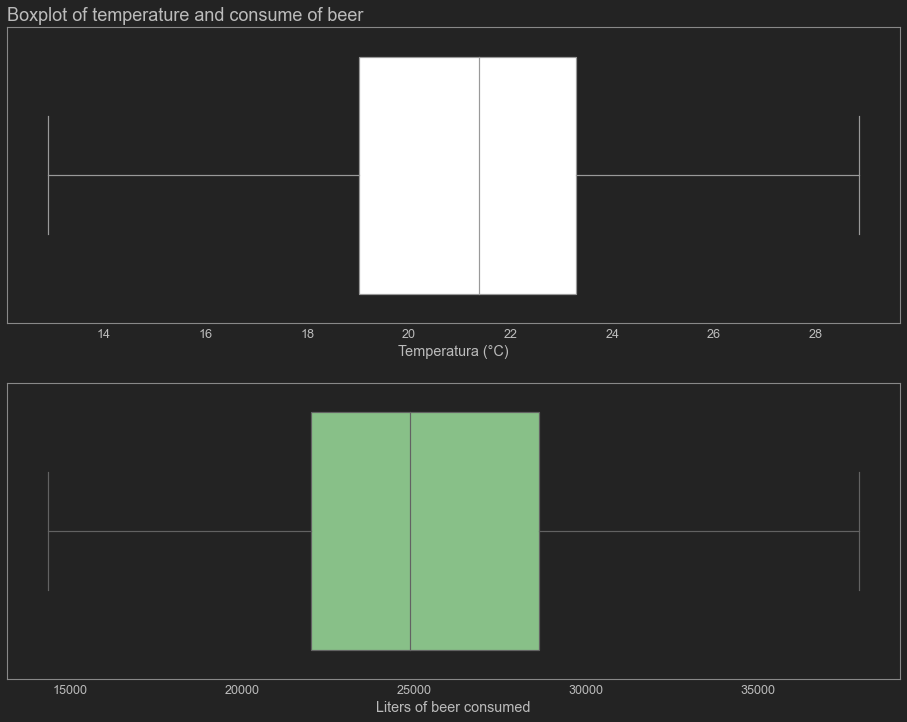

In [27]:
plt.figure(figsize=(16,12))
sns.set_palette('Accent', n_colors=2)
ax = plt.subplot(2,1,1) # Definindo o local da plotagem do primeiro gráfico
ax.set_title('Boxplot of temperature and consume of beer', fontsize = 18, loc='left')
ax = sns.boxplot(x= 'X', data= dataset, color = 'w')
ax.grid(False)
ax.set_xlabel('Temperatura (°C)')
ax = plt.subplot(2,1,2)
ax = sns.boxplot(x= 'Y', data= dataset)
ax.grid(False)
ax.set_xlabel('Liters of beer consumed')

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

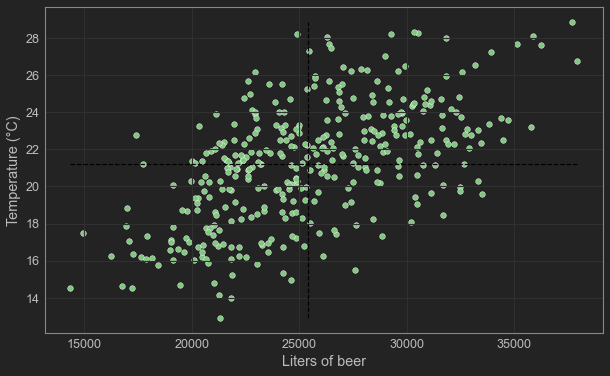

In [35]:
# visualizing the corr of "dataset[Y, X]"
x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x= x,y= y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')
ax.set_ylabel("Temperature (°C)")
ax.set_xlabel("Liters of beer")
ax=ax

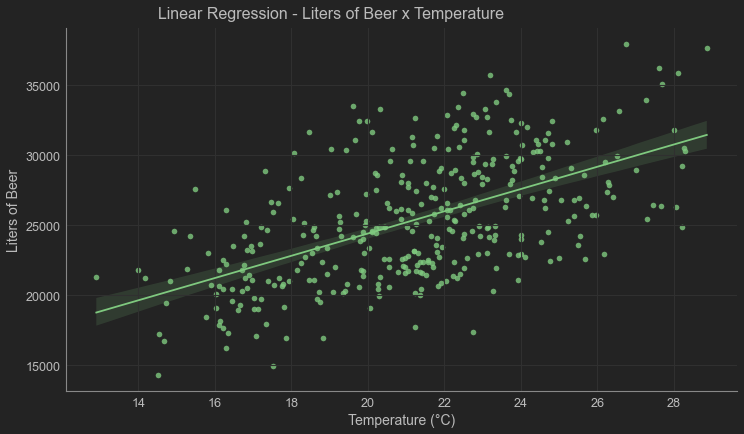

In [96]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Linear Regression - Liters of Beer x Temperature', fontsize=16, y=1.02)
ax.set_xlabels("Temperature (°C)", fontsize=14)
ax.set_ylabels("Liters of Beer", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [36]:
dataset.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Existe uma correlação linear fraca entre as variáveis

É possível quantificar a intensidade dessa relação?

Resp.: sim, utilizando a correlação entre elas (.corr())

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não, sómente através de teoria

### Prepare os dados para estimar um modelo de regressão linear simples

In [38]:
dataset.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [42]:
# series of Y (Liters of beer)
Y = dataset.Y

In [43]:
# dataset of X with added constant
X = sm.add_constant(dataset.X)
X

,const,X
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82
...,...,...
360,1.0,24.00
361,1.0,22.64
362,1.0,21.68
363,1.0,21.38


### Estime o modelo de regressão linear simples

In [44]:
result_regression = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [45]:
print(result_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.87e-33
Time:                        19:37:42   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [49]:
dataset['Y_Fcst'] = result_regression.predict().round(2)
dataset.head()

,Y,X,Y_Fcst
0,25461,27.30,30229.20
1,28972,27.02,30006.63
2,30814,24.82,28257.89
3,29799,23.98,27590.19
4,28900,23.82,27463.01


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [50]:
result_regression.predict()

array([30229.2005442 , 30006.63343384, 28257.89185243, 27590.19052135,
       27463.00931543, 27431.21401395, 27606.08817209, 28321.48245539,
       30944.59482751, 29799.96397422, 30483.56295604, 29164.05794462,
       28814.30962834, 29164.05794462, 29084.56969092, 29593.2945146 ,
       31469.21730193, 30992.28777973, 30960.49247825, 30531.25590826,
       28655.33312093, 25809.65363846, 25253.23586256, 26906.59153953,
       27924.04118689, 26334.27611288, 27288.13515729, 28941.49083426,
       28400.97070909, 26652.22912768, 25730.16538476, 27733.26937801,
       26397.86671584, 26938.38684101, 26111.70900252, 24649.12513443,
       25269.1335133 , 25905.0395429 , 26620.4338262 , 27606.08817209,
       27542.49756913, 28703.02607315, 30515.35825752, 28830.20727908,
       27860.45058393, 26731.71738138, 25698.37008328, 26620.4338262 ,
       26191.19725622, 27542.49756913, 28178.40359873, 28559.94721649,
       27955.83648837, 28718.92372389, 27844.55293319, 26207.09490696,
      

In [53]:
result_regression.predict([1,42])

array([41913.97383817])

In [57]:
print(f'The consume of beer for a day of average 42 °C would be arround {result_regression.predict([1,42])[0].round(2)} liters')

The consume of beer for a day of average 42 °C would be arround 41913.97 liters


### Obtenha os resíduos da regressão

In [58]:
result_regression.resid

0     -4768.200544
1     -1034.633434
2      2556.108148
3      2208.809479
4      1436.990685
          ...     
360    4700.911828
361    -430.047922
362   -3452.960686
363   -5056.495925
364   -5764.198900
Length: 365, dtype: float64

In [60]:
dataset['resid'] = result_regression.resid.round(2)
dataset.head()

,Y,X,Y_Fcst,resid
0,25461,27.30,30229.20,-4768.20
1,28972,27.02,30006.63,-1034.63
2,30814,24.82,28257.89,2556.11
3,29799,23.98,27590.19,2208.81
4,28900,23.82,27463.01,1436.99


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

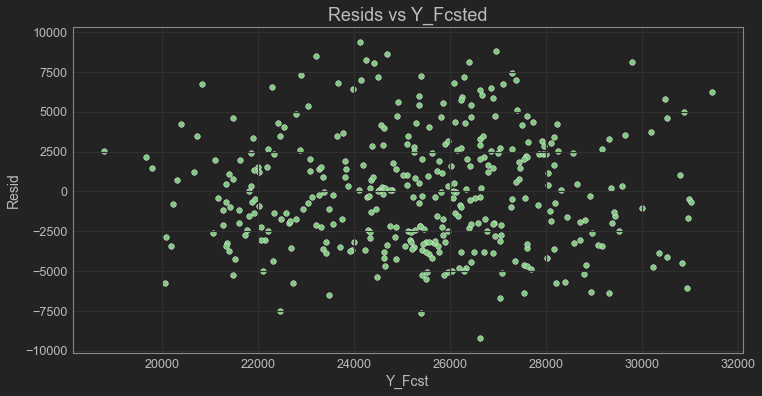

In [62]:
ax = sns.scatterplot(x=dataset.Y_Fcst, y=dataset.resid)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resids vs Y_Fcsted', fontsize=18)
ax.set_xlabel('Y_Fcst', fontsize=14)
ax.set_ylabel('Resid', fontsize=14)
ax = ax

### Obtenha o QQPlot dos resíduos

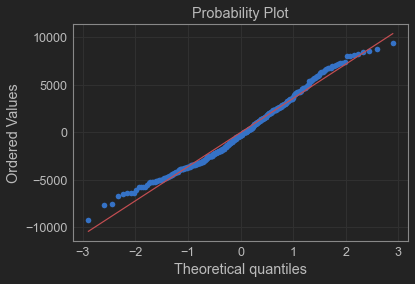

In [67]:
# or probplot 
from scipy.stats import probplot
import matplotlib.pyplot as plt
(_, (_, _, _)) = probplot(dataset.resid, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>
    The graph seems to behave a bit like a normal distribuition, the scatterplot indicates that there may not exist heteroscedasticity

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [86]:
r2 = result_regression.rsquared
r2

0.3301820493324321

### Manual calculating

In [87]:
dataset.head(1)

,Y,X,Y_Fcst,resid
0,25461,27.3,30229.2,-4768.2


 $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$

In [88]:
SQR = dataset.Y_Fcst.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQR

2325899386.3391767

In [98]:
result_regression.ess

2325899486.7377872

$SQT = \sum{(Y_i - \bar{Y})^2}$

In [89]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQT

7044294174.805479

In [90]:
R2 = SQR/SQT
R2

0.33018203507995947

In [94]:
r2.round(5) == R2.round(5)

True